In [1]:
import pickle
import pyunitwizard as puw
import numpy as np
from matplotlib import pyplot as plt

In [2]:
with open('trajectory_phipsi.pkl', 'rb') as f:
    trajectory_phipsi = pickle.load(f)

In [3]:
trajectory_phipsi = trajectory_phipsi.magnitude

In [4]:
lim_inf_phi = -180.0
n_bins_phi = 40
delta_phi = 360.0/n_bins_phi
trajectory_phipsi[:,0] = (trajectory_phipsi[:,0]-lim_inf_phi)/delta_phi

In [5]:
lim_inf_psi = -180.0
n_bins_psi = 40
delta_psi = 360.0/n_bins_psi
trajectory_phipsi[:,1] = (trajectory_phipsi[:,1]-lim_inf_psi)/delta_psi

In [6]:
trajectory_phipsi_bins = trajectory_phipsi.astype(int)

In [7]:
frequency_matrix = np.zeros((n_bins_phi, n_bins_psi), dtype=int)

In [8]:
for ii,jj in trajectory_phipsi_bins:
    frequency_matrix[ii,jj]+=1

In [9]:
sum_frequencies = frequency_matrix.sum()
free_energy_matrix = -np.log(frequency_matrix/sum_frequencies)

/tmp/ipykernel_1384061/3014311438.py:2: RuntimeWarning: divide by zero encountered in log
  free_energy_matrix = -np.log(frequency_matrix/sum_frequencies)


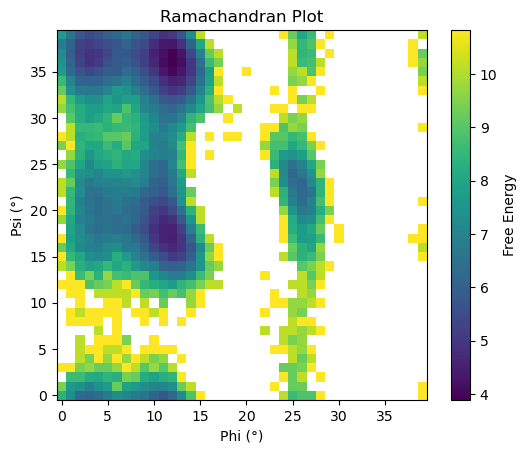

In [10]:
fig, ax = plt.subplots()

heatmap = ax.imshow(free_energy_matrix.T, origin='lower', vmin=free_energy_matrix.min(), vmax=-np.log(1.0/sum_frequencies), cmap='viridis')

# Agrega la barra de color
cbar = plt.colorbar(heatmap, ax=ax)
cbar.set_label('Free Energy')

# Opcional: etiquetas de ejes
ax.set_xlabel('Phi (°)')
ax.set_ylabel('Psi (°)')

plt.title("Ramachandran Plot")
plt.show()

In [11]:
import networkx as nx

G_freqs = nx.DiGraph()

In [12]:
prev_node = None

for ii,jj in trajectory_phipsi_bins:
    node = (ii,jj)

    if node not in G_freqs:
        G_freqs.add_node(node, weight=1)
    else:
        G_freqs.nodes[node]['weight'] += 1

    if prev_node is not None:
        if G_freqs.has_edge(prev_node, node):
            G_freqs[prev_node][node]['weight'] += 1
        else:
            G_freqs.add_edge(prev_node, node, weight=1)

    prev_node = node

In [15]:
G_prob = G_freqs.copy()

for u, v, data in G_prob.edges(data=True):
    transition_prob = data['weight'] / G_prob.nodes[u]['weight']
    data['weight'] = transition_prob

total_node_weight = sum(data['weight'] for _, data in G_prob.nodes(data=True))

for u, data in G_prob.nodes(data=True):
    data['weight'] /= total_node_weight  

In [16]:
import pickle

with open("raw_cmsn_dialanine.pkl", "wb") as fff:
    pickle.dump(G_freqs, fff)

with open("cmsn_dialanine.pkl", "wb") as fff:
    pickle.dump(G_prob, fff)